## **COVID-19 Image Classification Project**

**PROGRAM NAME**: Covid-19_image_classification_project                   
**AUTHOR**:     Kevin Kluck                                           
**DATE**:       11/18/2020                                            
                                                                  
**Python Version**:3.7.6                                                    
                                                                  
                                                                          
**ABSTRACT**: Perform pre-processing of image data, visualization of images, building CNN, and evaluate the model for covid-19 data.                                               
                                                                  


**Import the libraries, load dataset, print shape of data, visualize the images in train and test set.**

In [62]:
##############################
##                          ##
##      Import Libraries    ##
##                          ##
##############################
seed = 1729
import cv2
import math
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.utils.np_utils import to_categorical
from google.colab import files
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

############# python formating ##################
extra = {'Bold': '\x1b[1m',
        'Underline': '\x1b[4m',
        'End': '\x1b[0m'}

In [64]:
########## Mount Drive ##############
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


I would like to say thanks for who ever prepared the data from Kaggle.

In [65]:
############# Define Paths ############
data_path_image_training = '/content/drive/MyDrive/Colab Notebooks/Data/covid-19/trainimage.npy'
data_path_image_test = '/content/drive/MyDrive/Colab Notebooks/Data/covid-19/testimage.npy'
path_train = '/content/drive/MyDrive/Colab Notebooks/Data/covid-19/trainLabels.csv'
path_test = '/content/drive/MyDrive/Colab Notebooks/Data/covid-19/testLabels.csv'

In [66]:
x_train = np.load(data_path_image_training) #, encoding='bytes')

In [67]:
x_test = np.load(data_path_image_test) #, encoding='bytes')

In [68]:
label_train = pd.read_csv(path_train)

In [69]:
label_test = pd.read_csv(path_test)

In [70]:
########### Shape of Data ##############
print(extra['Bold'],extra['Underline'],"\nLabel Training Shape")
print("\n")
print(extra['End'],label_train.shape)
print(extra['Bold'],extra['Underline'],"\nImage Training Shape")
print("\n")
print(extra['End'],x_train.shape)
print(extra['Bold'],extra['Underline'],"\nLabel Test Shape")
print("\n")
print(extra['End'],label_test.shape)
print(extra['Bold'],extra['Underline'],"\nImage Test Shape")
print("\n")
print(extra['End'],x_test.shape)

  
Label Training Shape


 (251, 1)
  
Image Training Shape


 (251, 128, 128, 3)
  
Label Test Shape


 (66, 1)
  
Image Test Shape


 (66, 128, 128, 3)


In [71]:
########### View Data ###########
label_train.head()

,Label
0,Viral Pneumonia
1,Viral Pneumonia
2,Viral Pneumonia
3,Viral Pneumonia
4,Viral Pneumonia


In [72]:
label_test.head()

,Label
0,Viral Pneumonia
1,Viral Pneumonia
2,Viral Pneumonia
3,Viral Pneumonia
4,Viral Pneumonia


In [73]:
virus = label_train['Label'].unique()

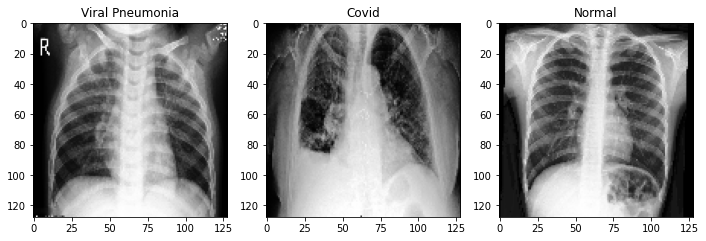

In [74]:
plt.figure(figsize=(16,10))
for i, s in enumerate(virus):
  plt.subplot(1,4,i + 1)
  plt.imshow(x_train[label_train[label_train['Label']==s].head(10).index[0]])
  plt.title(s)

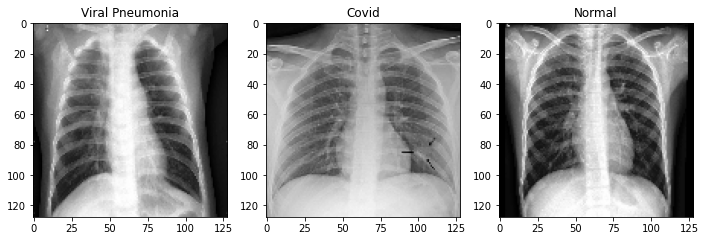

In [75]:
################## needs to be fixed
plt.figure(figsize=(16,10))
for i, s in enumerate(virus):
  plt.subplot(1,4,i + 1)
  plt.imshow(x_test[label_test[label_test['Label']==s].head(10).index[0]])
  plt.title(s)

### **Explore the Data**

In [76]:
########### Value count ################
print(extra['Bold'],extra['Underline'],"\n Counts for Label Training Data")
print("\n")
print(extra['End'],label_train['Label'].value_counts())

print(extra['Bold'],extra['Underline'],"\n Counts for Label Test Data")
print("\n")
print(extra['End'],label_test['Label'].value_counts())

  
 Counts for Label Training Data


 Covid              111
Viral Pneumonia     70
Normal              70
Name: Label, dtype: int64
  
 Counts for Label Test Data


 Covid              26
Viral Pneumonia    20
Normal             20
Name: Label, dtype: int64


In [77]:
########## Unique labels ################
print("Number of unique labels in training are:",len(label_train['Label'].unique()))
print("\n")
print(label_train['Label'].unique())
print("\n")
print("Number of unique labels in test are:",len(label_test['Label'].unique()))
print("\n")
print(label_test['Label'].unique())

Number of unique labels in training are: 3


['Viral Pneumonia' 'Covid' 'Normal']


Number of unique labels in test are: 3


['Viral Pneumonia' 'Covid' 'Normal']


### **Data Pre-processing**

In [78]:
############## Gaussian Blurring #############
############## Training Data ###############
preprocessed_images_train = []

for img in x_train:
   blurImg = cv2.GaussianBlur(img, (5,5),0)
   preprocessed_images_train.append(blurImg)

In [79]:
############## Test Data ###############
preprocessed_images_test = []

for img in x_test:
   blurImg = cv2.GaussianBlur(img, (5,5),0)
   preprocessed_images_test.append(blurImg)

Text(0.5, 1.0, 'Image 10 After')

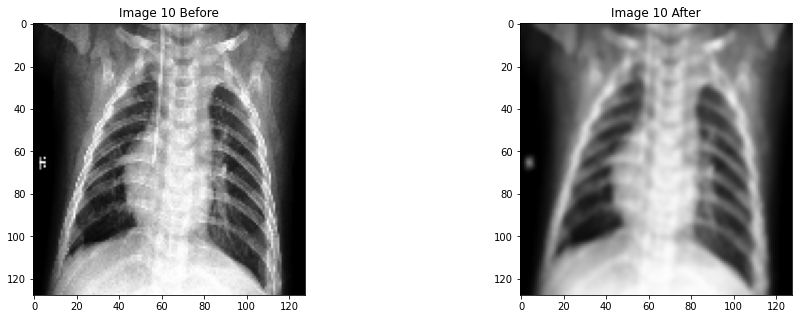

In [80]:
################## Before and After Gaussian Blurring ###########
############## Training Data ###############
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1); 
plt.title('Image 10 Before')
plt.imshow(x_train[10])              ######## before
plt.subplot(1, 2, 2); plt.imshow(preprocessed_images_train[10])  ########### after
plt.title('Image 10 After')

Text(0.5, 1.0, 'Image 6 After')

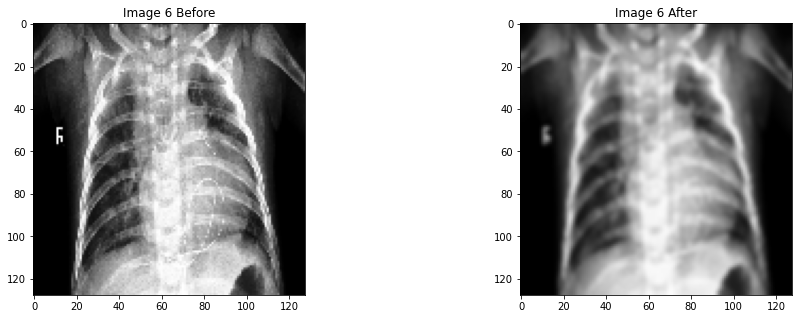

In [81]:
############## Test Data ###############
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1); 
plt.title('Image 6 Before')
plt.imshow(x_test[6])              ######## before
plt.subplot(1, 2, 2); plt.imshow(preprocessed_images_test[6])  ########### after
plt.title('Image 6 After')

In [82]:
############ Normalization of Data ####################
preprocessed_images_train = np.asarray(preprocessed_images_train)
x_train_n = preprocessed_images_train / 255
preprocessed_images_test = np.asarray(preprocessed_images_test)
x_test_n = preprocessed_images_test/ 255


### **Make Data Compatible**

In [83]:
x_train = x_train.reshape(x_train.shape[0], 128, 128, 3)
x_test = x_test.reshape(x_test.shape[0], 128, 128, 3)

In [84]:
print(extra['Bold'],extra['Underline'],"\nImage Train Shape")
print("\n")
print(extra['End'],x_train.shape)
print(extra['Bold'],extra['Underline'],"\nImage Test Shape")
print("\n")
print(extra['End'],x_test.shape)

  
Image Train Shape


 (251, 128, 128, 3)
  
Image Test Shape


 (66, 128, 128, 3)


The image data from training and test were already compatible with Keras because the shape didn't change.

In [85]:
####### Convert labesl from digits to one hot vectors
enc = LabelBinarizer()
y_train = enc.fit_transform(label_train)
y_test = enc.fit_transform(label_test)


In [86]:
######## View Transformation #########
y_train[1]

array([0, 0, 1])

In [87]:
y_test[1]

array([0, 0, 1])

### **Building CNN**

In [91]:
def CNN_architecture():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (5, 5), padding = 'same', activation = "relu", input_shape =(128, 128, 3)))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  
  model.add(layers.GlobalMaxPooling2D())
  model.add(layers.Dense(256, activation = "relu"))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(12, activation = "softmax"))

  return model

In [92]:
model = CNN_architecture()

In [93]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization_18 (Batc (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
global_max_pooling2d_6 (Glob (None, 32)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               8448      
_________________________________________________________________
dropout_18 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 12)               

In [94]:
### set the optimizer and loss function, and compile the model with them.

optimizer = tf.keras.optimizers.Adam(
    learning_rate = 0.001, 
    beta_1 = 0.9,
    beta_2 = 0.999,
    epsilon = 1e-07,
    amsgrad=False,
    name='Adam')

loss = tf.keras.losses.CategoricalCrossentropy()
model.compile(optimizer = optimizer, loss = loss, metrics = ["accuracy"])

In [95]:
############# Save models in directory  ############
!mkdir ./architecture

mkdir: cannot create directory ‘./architecture’: File exists


In [108]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint_path = "./architecture/cp-{epoch:04d}_loss{val_loss:.4f}.ckpt"

early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 10)

model_checkpoint = ModelCheckpoint(checkpoint_path, 
                                   monitor = "val_loss", 
                                   verbose = 1,
                                   save_best_only = False,
                                   save_weight_only = False,
                                   mode = 'auto',
                                   period =1)

In [109]:

batch_size = 3    # number of images in each batch
#Shuffle reshuffels images used in batch
history = model.fit(x_train,
                    y_train,
                    epochs = 20,
                    validation_data = (x_test, y_test),
                    batch_size = batch_size,
                    shuffle = True,
                    callbacks = [early_stopping, model_checkpoint])

Epoch 1/20


ValueError: ignored

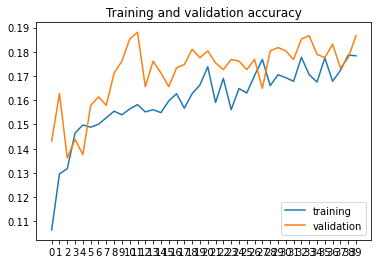

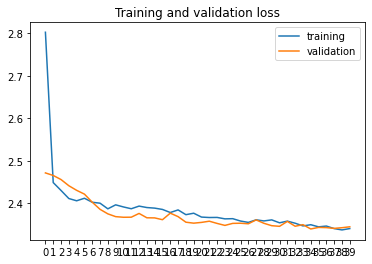

In [ ]:
########### Chose the best model ###################
new_model = tf.keras.models.load_model("./architecture/cp-{epoch:04d}.ckpt".format(epoch=12))

### **Fit and Evaluate the Model**

In [ ]:
# Fit the Model


In [ ]:
########### Evaluate the model ##################




In [ ]:
########################## Make Confuse Matrix ######################


**Visualize predictions:** for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]